<ol>
    <li> Design model (input, output size, forward pass)</li>
    <li> Construct loss and optimizer</li>
    <li> Training loop - n times iteration</li>
    <ol>
        <li>Forward Pass : Compute Prediction</li>
        <li>Backward Pass : Gradients</li>
        <li>Update weights</li>
    </ol>
</ol>

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

In [3]:
X_numpy

array([[-0.61175641],
       [-0.24937038],
       [ 0.48851815],
       [ 0.76201118],
       [ 1.51981682],
       [ 0.37756379],
       [ 0.51292982],
       [-0.67124613],
       [-1.39649634],
       [ 0.31563495],
       [-0.63699565],
       [-0.39675353],
       [-1.10061918],
       [ 0.90085595],
       [-1.09989127],
       [ 0.82797464],
       [-0.07557171],
       [-0.35224985],
       [-0.67066229],
       [-1.07296862],
       [-0.30620401],
       [ 2.18557541],
       [ 0.86540763],
       [ 0.19829972],
       [-0.38405435],
       [-0.68372786],
       [ 0.05080775],
       [ 0.58281521],
       [ 1.25286816],
       [-0.75439794],
       [-0.34934272],
       [-0.88762896],
       [ 0.18656139],
       [ 0.87616892],
       [ 0.83898341],
       [-0.50446586],
       [-0.34385368],
       [ 1.6924546 ],
       [-2.3015387 ],
       [ 0.93110208],
       [ 2.10025514],
       [ 1.46210794],
       [-0.84520564],
       [-0.87785842],
       [-0.3224172 ],
       [ 0

In [4]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y

tensor([-5.5539e+01, -1.0662e+01,  2.2757e+01,  1.0110e+02,  1.4434e+02,
         3.3289e+01,  3.3015e+01, -2.5887e+01, -9.9639e+01,  2.3803e+01,
        -4.5589e+01, -8.3388e+00, -9.5315e+01,  3.6407e+01, -8.7293e+01,
         6.7669e+01, -1.3687e+01, -5.5441e+01, -6.5340e+01, -5.4450e+01,
        -2.8835e+01,  1.7884e+02,  6.5084e+01,  2.6668e+01, -1.8546e+01,
        -4.1499e+01,  8.5583e-01,  4.4562e+01,  1.1598e+02, -6.4620e+01,
        -2.5931e+01, -6.0882e+01,  1.8720e+01,  7.5070e+01,  1.1720e+02,
        -2.2698e+01, -5.6363e+01,  1.8084e+02, -1.9257e+02,  6.8503e+01,
         1.6552e+02,  1.0500e+02, -7.0434e+01, -5.8769e+01, -4.1576e+01,
         7.3247e+01,  4.0966e+01,  8.0462e+01, -2.8794e+01,  3.4234e+01,
        -4.1715e+01,  1.4355e+01,  7.9336e+01,  2.7129e+01, -3.9487e+01,
         6.6805e+01,  9.5531e+01,  3.5610e+00,  1.0857e-01,  5.6495e+01,
         5.1575e+01, -2.0974e+00, -2.6656e+01,  3.9742e+01,  3.6101e+01,
        -7.5602e+01,  1.9713e+01, -7.1601e+01, -1.9

In [5]:
y = y.view(y.shape[0], 1)

In [6]:
n_samples, n_features = X.shape

In [7]:
#model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [8]:
#loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [9]:
# Training Loop
num_epochs = 100

In [10]:
for epoch in range(num_epochs):
    
    #Forward pass and loss
    y_pred = model(X)
    loss = criterion(y_pred, y)
    
    # Backward pass
    loss.backward()
    
    #update
    optimizer.step()
    
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')
        

epoch: 10, loss = 4334.6738
epoch: 20, loss = 3235.5535
epoch: 30, loss = 2440.1433
epoch: 40, loss = 1863.9148
epoch: 50, loss = 1446.0632
epoch: 60, loss = 1142.7849
epoch: 70, loss = 922.4810
epoch: 80, loss = 762.3274
epoch: 90, loss = 645.8190
epoch: 100, loss = 561.0069


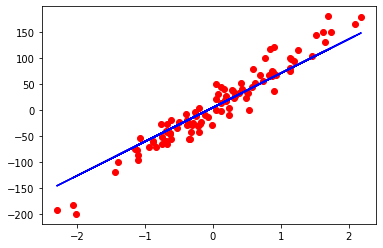

In [11]:
#plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()